# Wide and deep Network

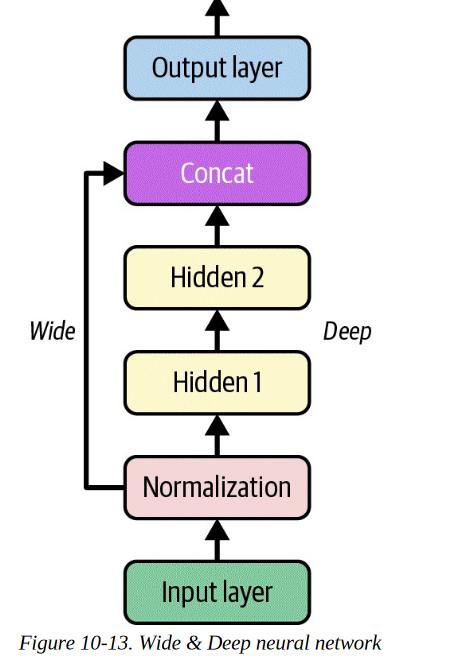

In [47]:
from PIL import Image
from IPython.display import display
img = Image.open('../../images/wide_and_deep_network.png')
display(img)


# Import Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras as keras

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [50]:
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

In [51]:
print(X[1:3])
print(y[1:3])

[[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]
[3.585 3.521]


In [52]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Split train test

In [54]:
X_temp, X_test,y_temp,y_test = train_test_split(
    X,
    y,
    random_state=2024,
    test_size=0.2
)

X_train, X_valid,y_train, y_valid = train_test_split(
    X_temp,
    y_temp,
    random_state=2024,
    test_size=0.2
) 

# Train model

In [12]:
print(X_train.shape[1:])

(8,)


In [13]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(40, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(40, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = norm_layer(input_layer)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)



model = tf.keras.Model(inputs=[input_layer], outputs= [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 40)                   360       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 40)                   1640      ['dense[0][0]']           

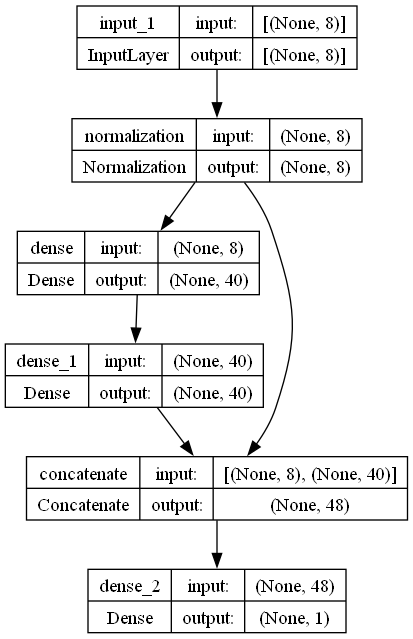

In [14]:
tf.keras.utils.plot_model(model, "housing_price_model_wide_deep.png", show_shapes=True)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [16]:
# calculate mean and std
norm_layer.adapt(X_train)


In [17]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 [==============================] - 2s 2ms/step - loss: 1.1709 - root_mean_squared_error: 1.0821 - val_loss: 0.5249 - val_root_mean_squared_error: 0.7245
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4480 - root_mean_squared_error: 0.6693 - val_loss: 0.4381 - val_root_mean_squared_error: 0.6619
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3969 - root_mean_squared_error: 0.6300 - val_loss: 0.4097 - val_root_mean_squared_error: 0.6401
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3832 - root_mean_squared_error: 0.6190 - val_loss: 0.3884 - val_root_mean_squared_error: 0.6232
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3635 - root_mean_squared_error: 0.6029 - val_loss: 0.4159 - val_root_mean_squared_error: 0.6449
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3539 - root_mean_squared_error: 0.5949 - val_loss: 0.3703 - val_

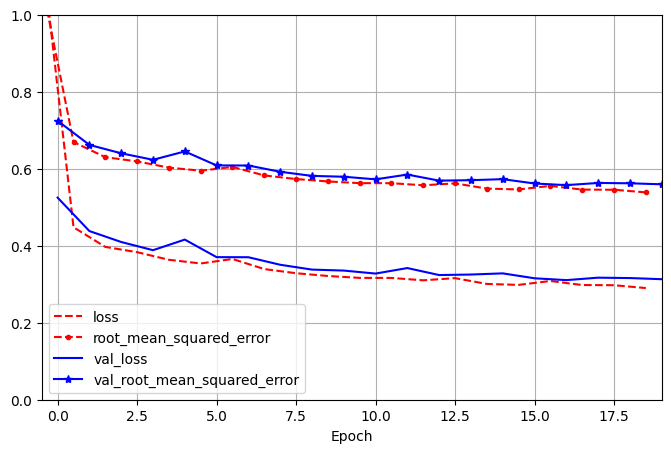

In [19]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    # shifted 0.5 points because validation loss is computed at the end of epoch and training loss comes as mean of all the batches in epoch
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5) 
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 19, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

# Run Predictions

In [20]:
loss_test, rmse_test = model.evaluate(X_test, y_test)
print(loss_test, rmse_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3124 - root_mean_squared_error: 0.5589
0.3124023675918579 0.5589296817779541


# Split Input model
Few features in deep path and few in wide

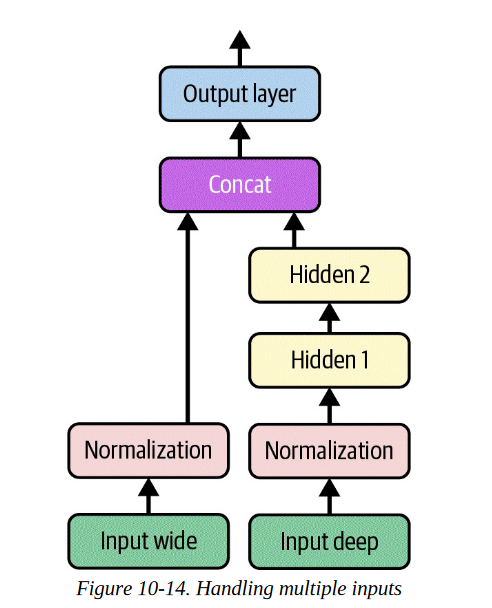

In [30]:
from PIL import Image
from IPython.display import display
img = Image.open('../../images/wide_and_deep_split_network.png')
display(img)

In [37]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape = [5], name="input_wide") # feature 0-4
input_deep = tf.keras.layers.Input(shape = [6], name="input_deep") # feature 2-7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(40, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(40, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)


model = tf.keras.Model(inputs=[input_wide, input_deep], outputs= [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_deep (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 6)                    13        ['input_deep[0][0]']          
 tion)                                                                                            
                                                                                                  
 input_wide (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 40)                   280       ['normalization_1[0][0]'] 

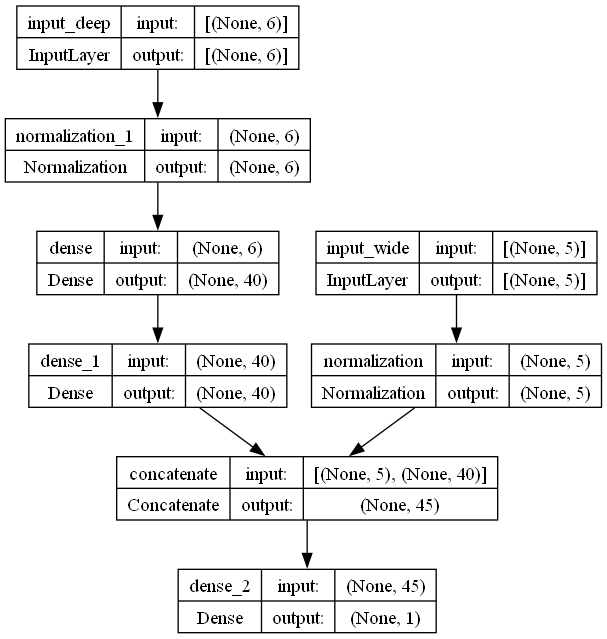

In [38]:
tf.keras.utils.plot_model(model, "housing_price_wide_spli_deepl.png", show_shapes=True)

Now we can compile the model as usual, but when we call the fit() method,
instead of passing a single input matrix X_train, we must pass a pair of
matrices (X_train_wide, X_train_deep), one per input. The same is true for
X_valid, and also for X_test and X_new when we call evaluate() or
predict()

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [40]:
X_train_wide, X_train_deep = X_train[:,:5], X_train[:,2:]
X_test_wide, X_test_deep = X_test[:,:5], X_test[:,2:]
X_valid_wide, X_valid_deep = X_valid[:,:5], X_valid[:,2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [41]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [42]:
history = model.fit(
    {'input_wide': X_train_wide, 'input_deep': X_train_deep}, 
    y_train, 
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 1.2888 - root_mean_squared_error: 1.1353 - val_loss: 0.5602 - val_root_mean_squared_error: 0.7485
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4812 - root_mean_squared_error: 0.6937 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6739
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4093 - root_mean_squared_error: 0.6397 - val_loss: 0.4109 - val_root_mean_squared_error: 0.6410
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3856 - root_mean_squared_error: 0.6210 - val_loss: 0.3851 - val_root_mean_squared_error: 0.6206
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3655 - root_mean_squared_error: 0.6046 - val_loss: 0.4061 - val_root_mean_squared_error: 0.6373
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3547 - root_mean_squared_error: 0.5956 - val_loss: 0.3716 - val_

In [43]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3223 - root_mean_squared_error: 0.5678


In [44]:
print(mse_test)

[0.3223460018634796, 0.5677552223205566]


# Multi output Model

Here are adding an auxiliary output for regularization

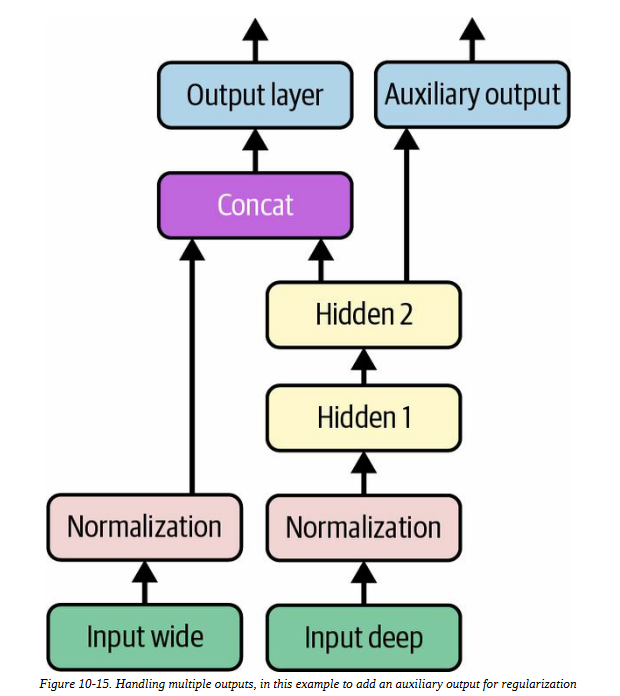

In [46]:
display(Image.open('../../images/multi_output_network.png'))

In [64]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1, name="main_output")(concat) # main output
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2) # output for regularization

model = tf.keras.Model(
    inputs = [input_wide, input_deep],
    outputs = [output, aux_output]
)

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=("mse", "mse"), # two losses for two outputs 
    loss_weights=(0.9, 0.1), # weights of each loss in final gradient calculation
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"]
)

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_5 (Normaliza  (None, 6)                    13        ['input_4[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_3 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 30)                   210       ['normalization_5[0][0]'

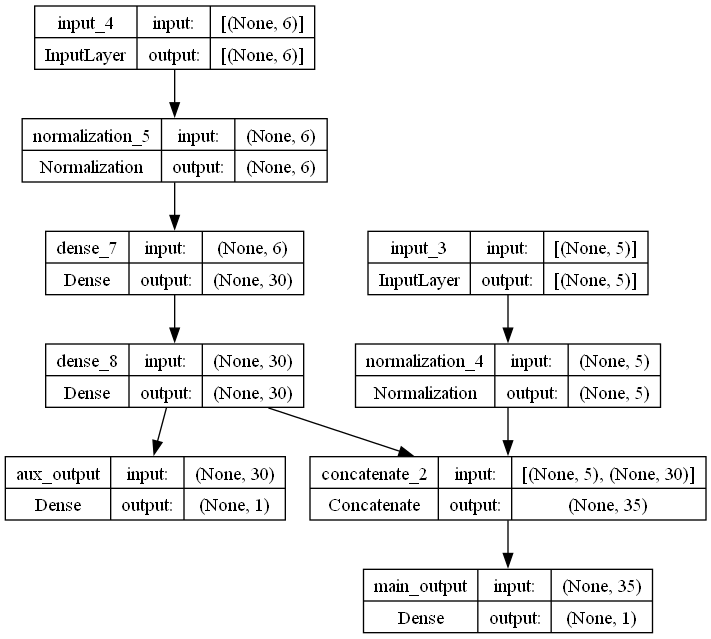

In [67]:
tf.keras.utils.plot_model(model, "double_output_network.png", show_shapes=True)

In [68]:
X_train_wide, X_train_deep = X_train[:,:5], X_train[:,2:]
X_test_wide, X_test_deep = X_test[:,:5], X_test[:,2:]
X_valid_wide, X_valid_deep = X_valid[:,:5], X_valid[:,2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [69]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [70]:
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20,
    validation_data=
    ((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20


413/413 [==============================] - 2s 2ms/step - loss: 1.6231 - main_output_loss: 1.5299 - aux_output_loss: 2.4619 - main_output_root_mean_squared_error: 1.2369 - aux_output_root_mean_squared_error: 1.5690 - val_loss: 0.6708 - val_main_output_loss: 0.6230 - val_aux_output_loss: 1.1006 - val_main_output_root_mean_squared_error: 0.7893 - val_aux_output_root_mean_squared_error: 1.0491
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5532 - main_output_loss: 0.5208 - aux_output_loss: 0.8450 - main_output_root_mean_squared_error: 0.7217 - aux_output_root_mean_squared_error: 0.9192 - val_loss: 0.4844 - val_main_output_loss: 0.4641 - val_aux_output_loss: 0.6672 - val_main_output_root_mean_squared_error: 0.6812 - val_aux_output_root_mean_squared_error: 0.8168
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4469 - main_output_loss: 0.4289 - aux_output_loss: 0.6083 - main_output_root_mean_squared_error: 0.6549 - aux_output_root_mean_

In [71]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 103ms/step


{'main_output': array([[1.2982193],
        [2.3439472],
        [3.6863728]], dtype=float32),
 'aux_output': array([[1.0252987],
        [2.60624  ],
        [3.7350028]], dtype=float32)}

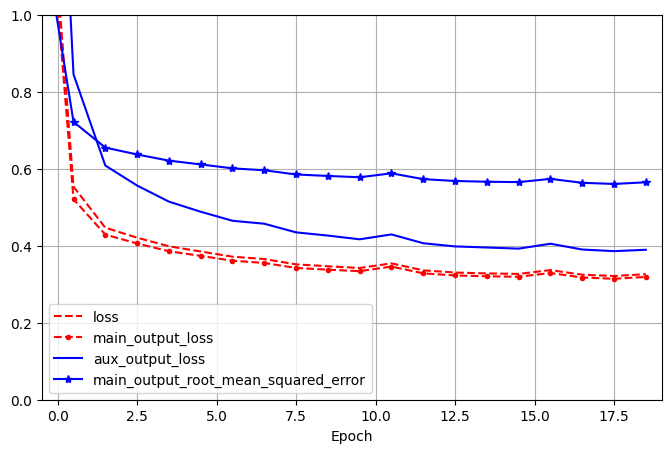

In [72]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    # shifted 0.5 points because validation loss is computed at the end of epoch and training loss comes as mean of all the batches in epoch
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5) 
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 19, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()